In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import IPython.display as ipd
import numpy as np

### A1.

#### Use librosa.effects.trim() to remove the silence parts of speech from beginning and end of your recorded signal. Listen to the new signal and perceptually compare the audio with original.

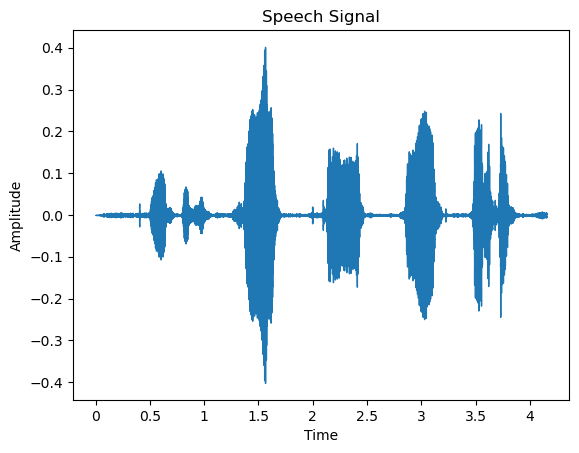

In [3]:
y, sr = librosa.load('sumanth.wav')
librosa.display.waveshow(y)
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

#### Plotting the Original speech signal

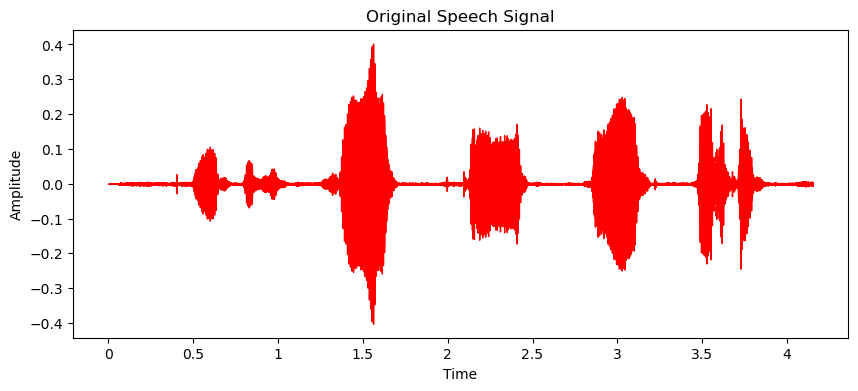

In [6]:
import librosa
import matplotlib.pyplot as plt

# Load the audio file
audio, sample_rate = librosa.load('sumanth.wav')

# Display the original speech signal 
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sample_rate, color='red')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

#### Trim the silent parts from the beginning and end of the signal and plot the trimmed signal

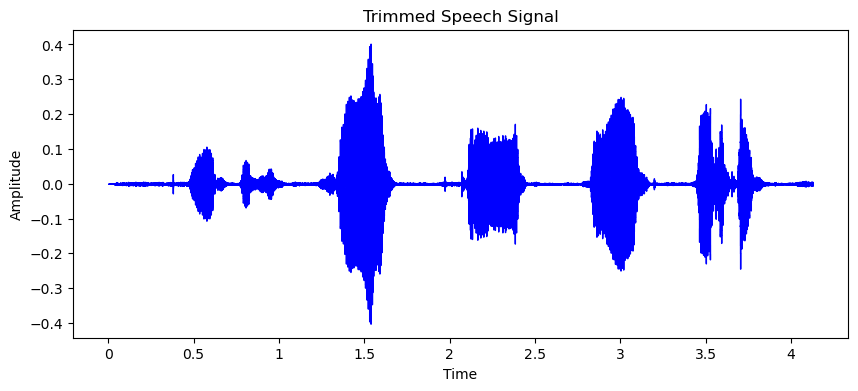

In [7]:
y_trimmed_audio,index= librosa.effects.trim(y)

# Display the original speech signal 
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_trimmed_audio, sr=sample_rate, color='blue')
plt.title('Trimmed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

#### Comparing the audio's of trimmed and Original audio signal

In [8]:
import IPython.display as ipd

print("Trimmed Speech Signal")
ipd.Audio(data=y_trimmed_audio,rate=sample_rate)

Trimmed Speech Signal


In [9]:
print("Original Speech Signal")
ipd.Audio(data=audio,rate=sample_rate)

Original Speech Signal


### A2. 

Use librosa.effects.split() to split the recorded speech with detected silences. Play around with the top_db parameter and see the effects of split. Listen to the generated signals and  observe the split quality.

In [10]:
y, sr = librosa.load('sumanth.wav')

segments = librosa.effects.split(y, top_db=20)  # Adjust top_db as needed

for i, segment in enumerate(segments):
    start, end = segment
    segment_audio = y[start:end]

    print(f"Playing Segment {i+1}: Duration {len(segment_audio)/sr} seconds")
    display(Audio(segment_audio, rate=sr))

Playing Segment 1: Duration 0.2089795918367347 seconds


Playing Segment 2: Duration 0.11609977324263039 seconds


Playing Segment 3: Duration 0.09287981859410431 seconds


Playing Segment 4: Duration 0.37151927437641724 seconds


Playing Segment 5: Duration 0.37151927437641724 seconds


Playing Segment 6: Duration 0.34829931972789113 seconds


Playing Segment 7: Duration 0.3947392290249433 seconds


### A3.
#### Use the IEEE paper reference available above for silence detection. Compare the results with the silence detection output from librosa package.

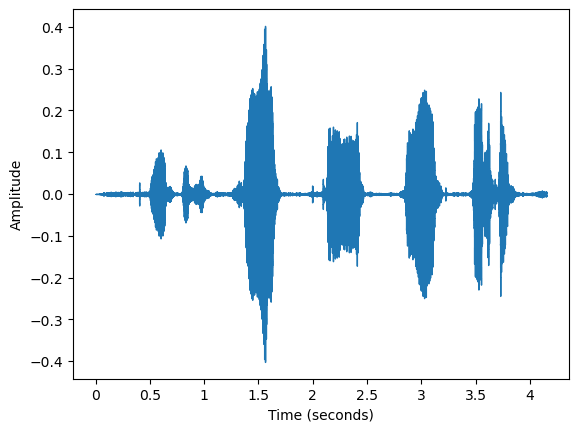

(1025, 90)


80.0

In [11]:
signal, sr = librosa.load("sumanth.wav")
from librosa import display
import matplotlib.pyplot as plt 
plt.figure()
librosa.display.waveshow(y=signal, sr=sr) 
plt.xlabel("Time (seconds)") 
plt.ylabel("Amplitude") 
plt.show()

n_fft = 2048
S= librosa.stft(signal, n_fft=n_fft, hop_length=n_fft//2)
print(S.shape)
D = librosa.amplitude_to_db(np.abs(S), ref=np.max) 
np.max(abs(D))


In [12]:
no_mute = librosa.effects.split(signal)
no_mute

array([[  512, 91552]])

In [13]:
def displayTime(startFrame, endFrame):    
    print(' start time: ' + str(startFrame/sr) + ', end time: ' + str(endFrame/sr))
for i in no_mute:
    displayTime(i[0],i[1])

 start time: 0.023219954648526078, end time: 4.152018140589569


 start time: 0.023219954648526078, end time: 4.152018140589569


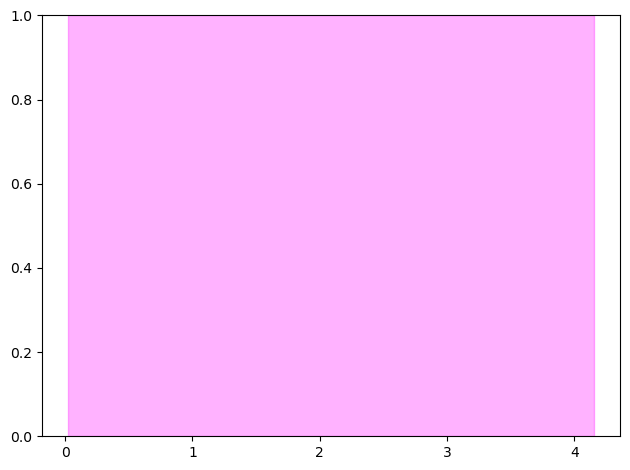

In [14]:
for i, (start, end) in enumerate(no_mute):
    displayTime(start, end)
    if i % 2 == 0:
        plt.axvspan(start/sr, end/sr, color='magenta', alpha=0.3)  # Plot silence segments in blue
    else:
        plt.axvspan(start/sr, end/sr, color='green', alpha=0.3)  # Plot non-silence segments in orange

plt.tight_layout()
plt.show()

C:\Users\suman\AppData\Local\Temp\ipykernel_20680\1174569416.py:4: RuntimeWarning: divide by zero encountered in log10
  signal_db = 20 * np.log10(np.abs(signal) / max_amplitude)


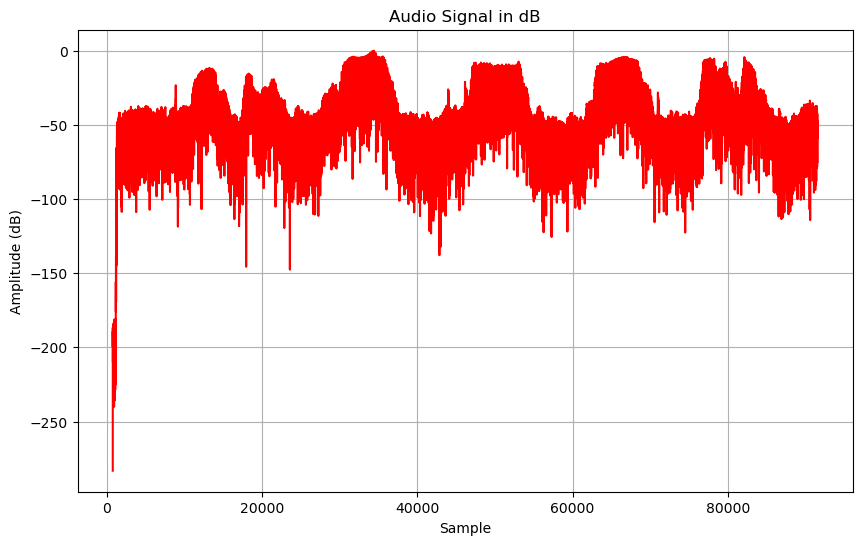

In [15]:
max_amplitude = np.max(np.abs(signal))

# Convert amplitude to dB
signal_db = 20 * np.log10(np.abs(signal) / max_amplitude)

# Plot the dB representation of the signal
plt.figure(figsize=(10, 6))
plt.plot(signal_db, color='red')
plt.xlabel('Sample')
plt.ylabel('Amplitude (dB)')
plt.title('Audio Signal in dB')
plt.grid(True)
plt.show()